Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [3]:
df=pd.read_csv("netflix1.csv")
#Display the first 5 rows of the data
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
#Display the last 5 rows of the data
df.tail(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [7]:
#check the shape of the dataset
df.shape

(8790, 10)

In [9]:
#Check the name of each columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [11]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [15]:
#Display statistical data of numerical columns
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Preprocessing

In [18]:
#Check for the null values in the dataset
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [20]:
#Check for the duplicate rows
df.duplicated().sum()


0

In [22]:
# Convert date object into datetime
df['Date']=pd.to_datetime(df['date_added'])

In [24]:
df.Date.head(5)

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-22
4   2021-09-24
Name: Date, dtype: datetime64[ns]

In [26]:
print(df['rating'].value_counts())

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


In [28]:
print(df['country'].value_counts())

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64


In [30]:
# Check for empty or unusual values
print(df['director'].value_counts().head())

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Name: count, dtype: int64


In [32]:
# Check lengths of text fields
print(df['title'].apply(len).describe())

count    8790.000000
mean       17.716268
std        10.622755
min         1.000000
25%        10.000000
50%        15.000000
75%        23.000000
max       104.000000
Name: title, dtype: float64


Exploratory data Analysis

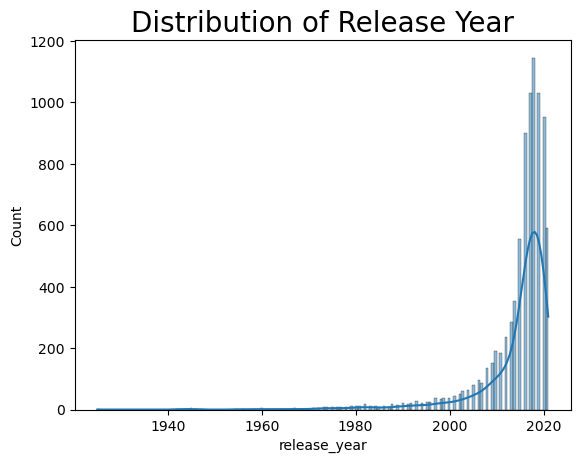

In [35]:
# Understand the Distribution of Each Column
# Numeric Columns (e.g., release_year)

# Histogram for distribution
sns.histplot(df['release_year'], kde=True)
plt.title('Distribution of Release Year', fontsize=20)
plt.show()

C:\Users\lucky\AppData\Local\Temp\ipykernel_2516\4077848893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='viridis')


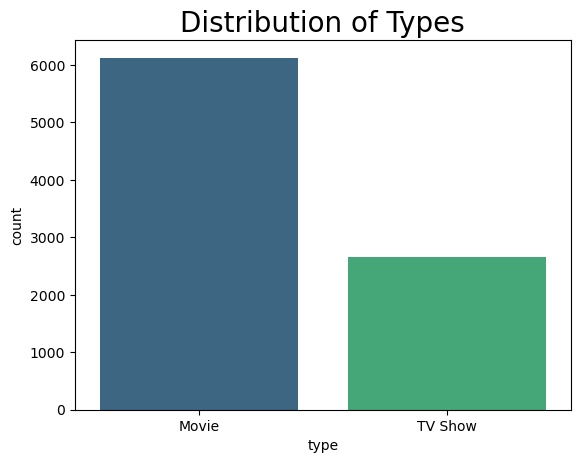

In [37]:
# Categorical Columns (e.g., rating, type)
# Bar plot for counts
sns.countplot(x='type', data=df, palette='viridis')
plt.title('Distribution of Types', fontsize=20)
plt.show()


In [39]:
# Content Added Over Time
# Extract year and month from 'date_added'
df['year_added'] = df['Date'].dt.year
df['month_added'] = df['Date'].dt.month

C:\Users\lucky\AppData\Local\Temp\ipykernel_2516\2062266590.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=df, palette='coolwarm')


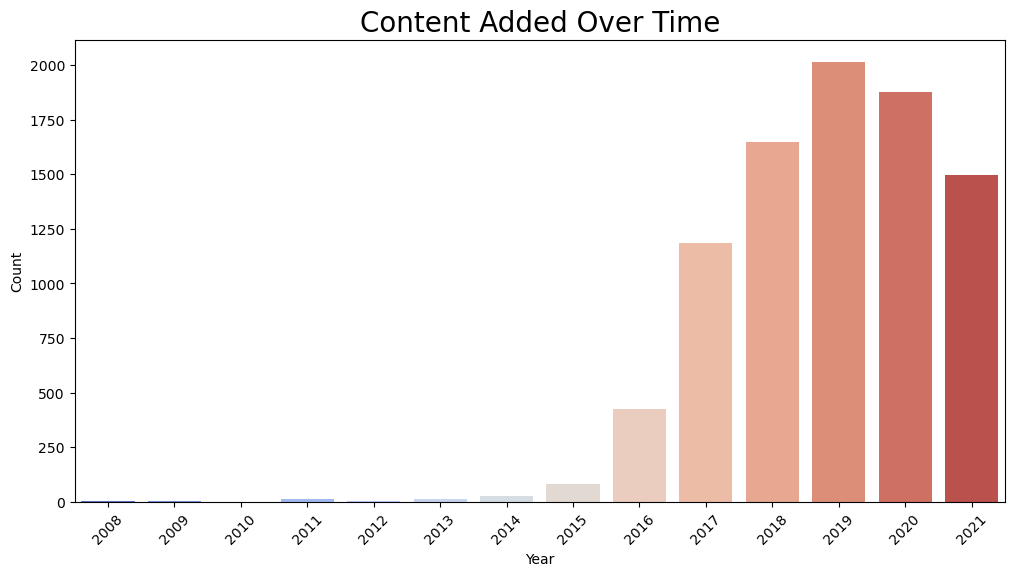

In [41]:
# Plot content added over the years
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=df, palette='coolwarm')
plt.title('Content Added Over Time', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [42]:
# Content distribution on Netflix
df['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

Text(0.5, 0.98, 'Total Content on Netflix')

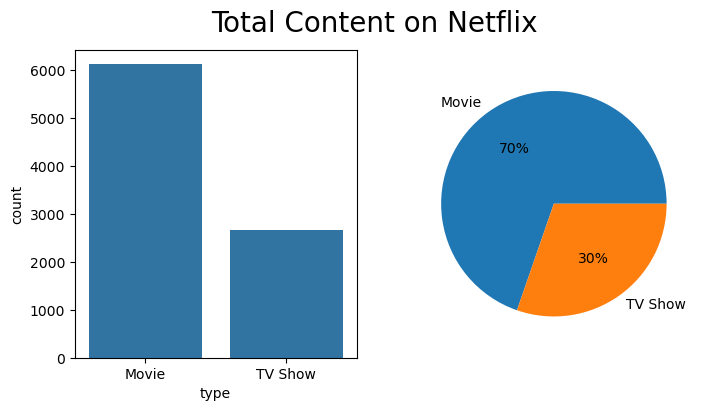

In [45]:
freq=df['type'].value_counts()
fig, axes=plt.subplots(1,2, figsize=(8, 4))
sns.countplot(df, x=df['type'], ax=axes[0])
plt.pie(freq, labels=['Movie', 'TV Show'], autopct='%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize=20)

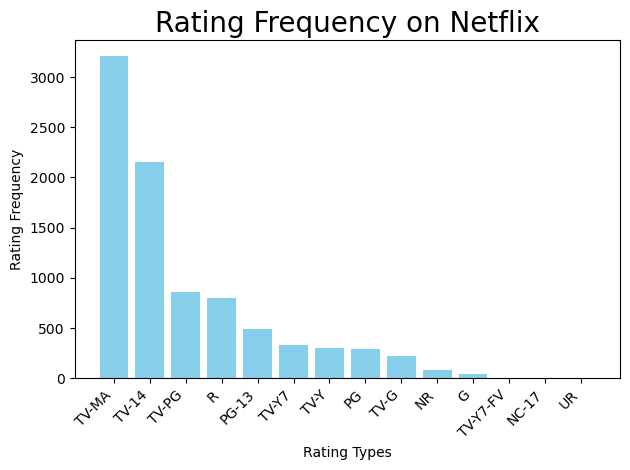

In [47]:
# Visual representation of rating frequency of movies and TV Shows on Netflix.
ratings = df['rating'].value_counts().reset_index()
ratings.columns = ['rating', 'count']  # Rename columns for clarity
ratings = ratings.sort_values(by='count', ascending=False)

# Plotting
import matplotlib.pyplot as plt

plt.bar(ratings['rating'], ratings['count'], color='skyblue')  # Added color for better visuals
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.title('Rating Frequency on Netflix', fontsize=20)  # Use title instead of suptitle
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


Text(0.5, 0.98, 'Rating on Netflix')

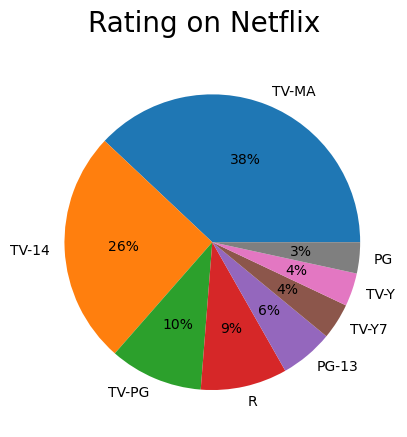

In [49]:
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8],
autopct='%.0f%%')
plt.suptitle('Rating on Netflix', fontsize=20)

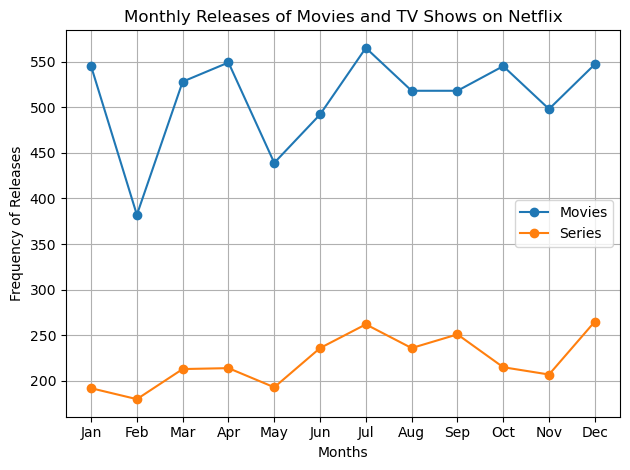

In [51]:
# Ensure the 'month' column exists and is derived from 'date_added'
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month'] = df['date_added'].dt.month

# Monthly counts for Movies and TV Shows
monthly_movie_release = df[df['type'] == 'Movie']['month'].value_counts().sort_index()
monthly_series_release = df[df['type'] == 'TV Show']['month'].value_counts().sort_index()

plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies', marker='o')
plt.plot(monthly_series_release.index, monthly_series_release.values, label='Series', marker='o')
plt.xlabel("Months")
plt.ylabel("Frequency of Releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.title("Monthly Releases of Movies and TV Shows on Netflix")
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


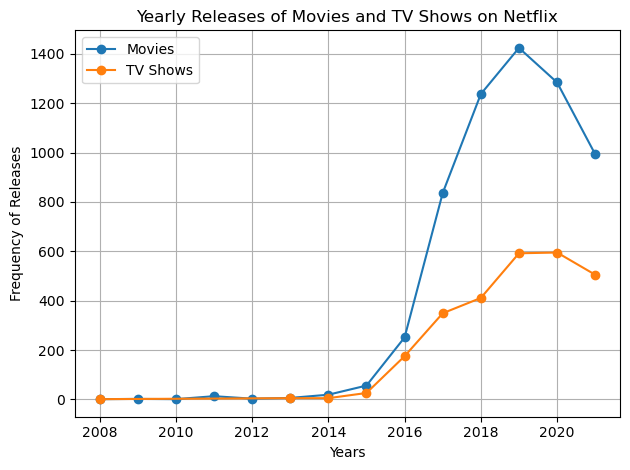

In [53]:
# Ensure the 'date_added' column is in datetime format and create a 'year' column
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year'] = df['date_added'].dt.year

# Yearly counts for Movies and TV Shows
yearly_movie_releases = df[df['type'] == 'Movie']['year'].value_counts().sort_index()
yearly_series_releases = df[df['type'] == 'TV Show']['year'].value_counts().sort_index()

plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies', marker='o')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV Shows', marker='o')
plt.xlabel("Years")
plt.ylabel("Frequency of Releases")
plt.grid(True)
plt.title("Yearly Releases of Movies and TV Shows on Netflix")
plt.legend()
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


Analyze Relationships Between Variables

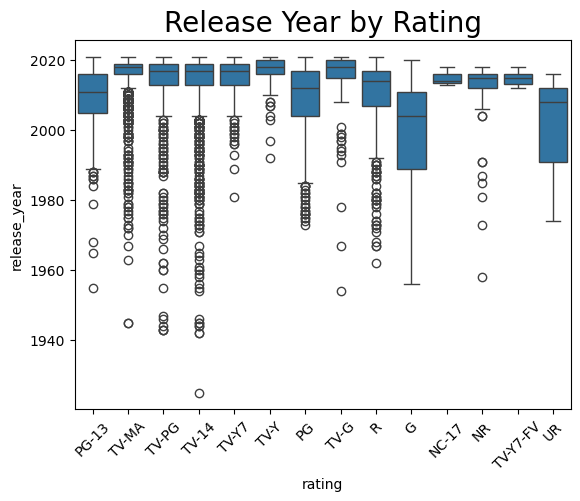

In [56]:
#Categorical vs Numeric (e.g., rating vs release_year)
# Box plot to see distributions
sns.boxplot(x='rating', y='release_year', data=df)
plt.xticks(rotation=45)
plt.title('Release Year by Rating', fontsize=20)
plt.show()

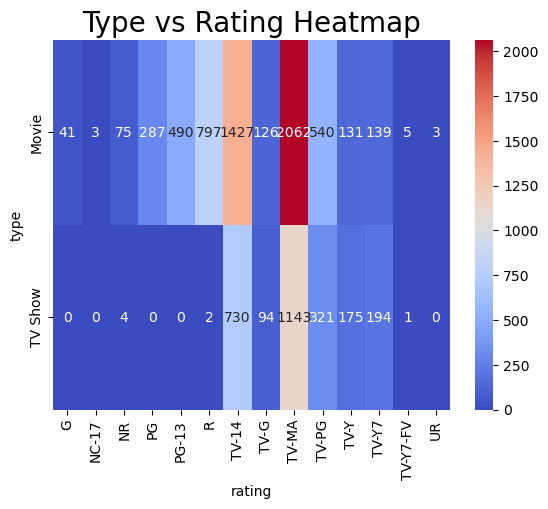

In [58]:
#Categorical vs Categorical (e.g., type vs rating)
# Cross-tab and heatmap
crosstab = pd.crosstab(df['type'], df['rating'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm')
plt.title('Type vs Rating Heatmap', fontsize=20)
plt.show()


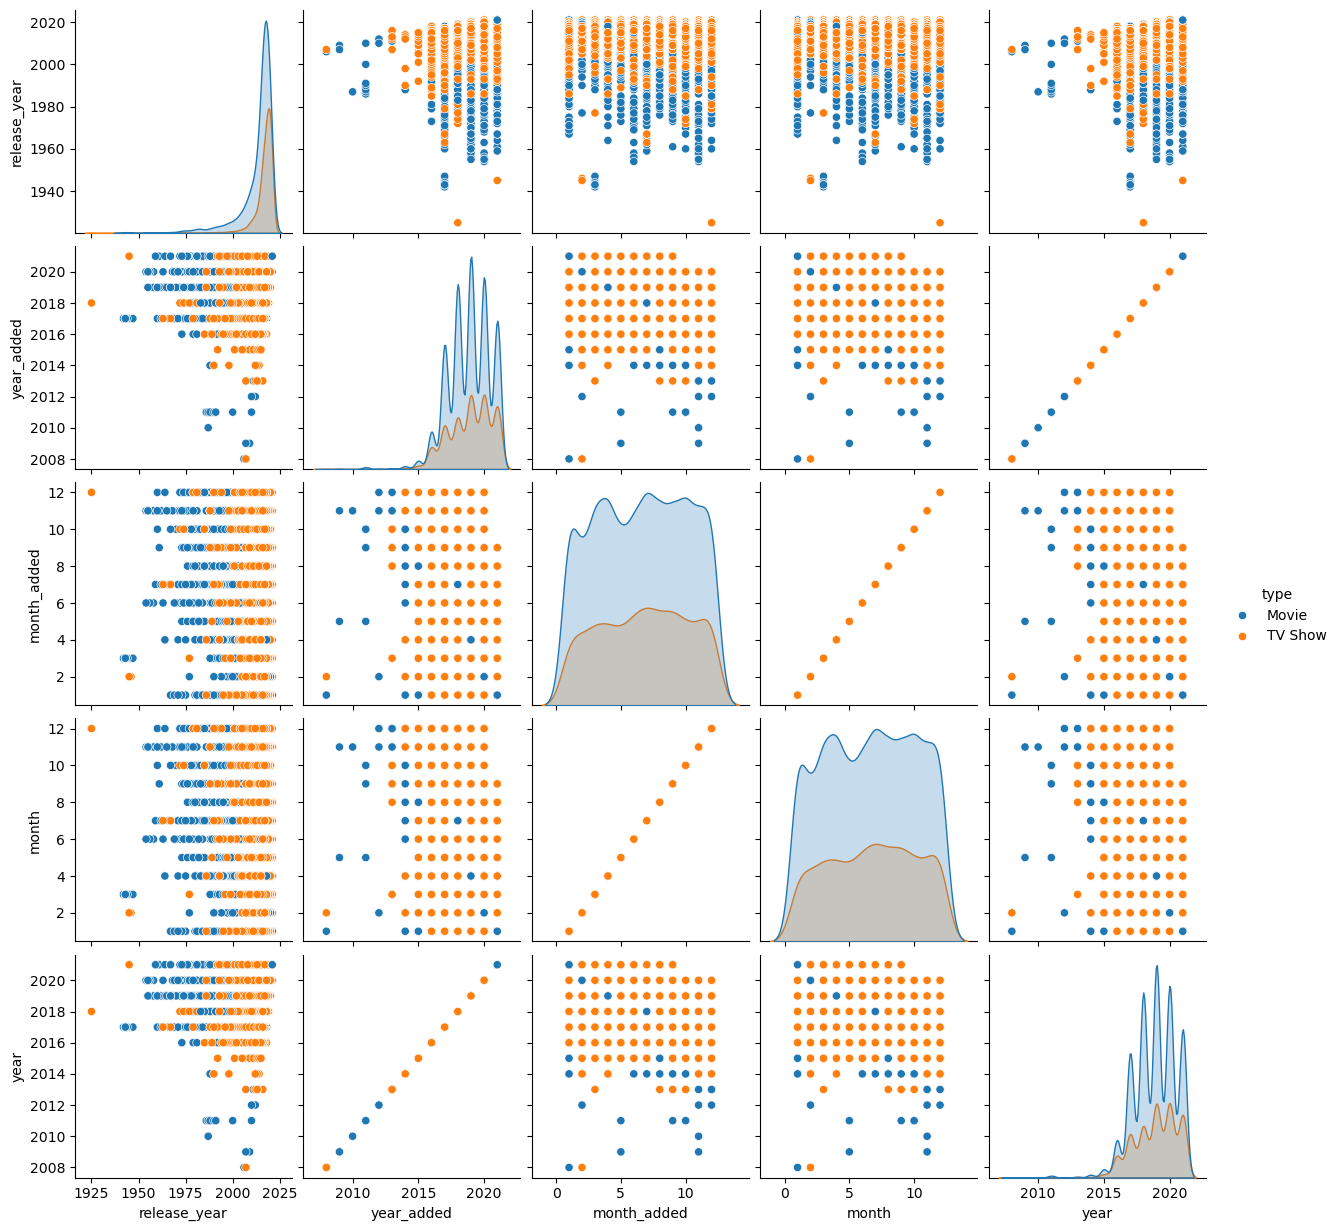

In [60]:
# Pair plot for numeric relationships
sns.pairplot(df, diag_kind='kde', hue='type')
plt.show()


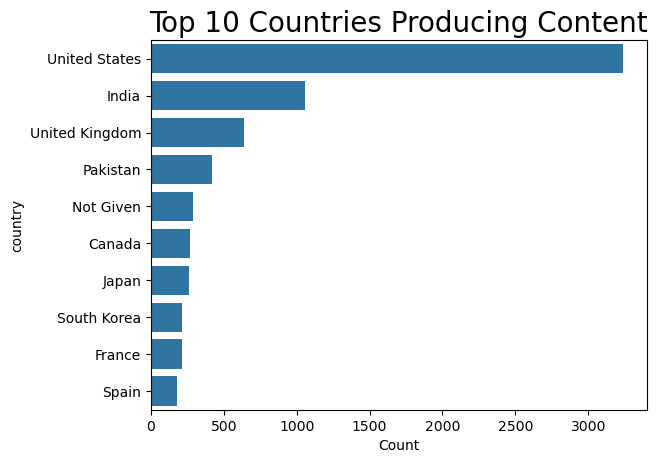

In [61]:
#Explore Top Insights
# 1. Top Countries Producing Content

top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries Producing Content', fontsize=20)
plt.xlabel('Count')
plt.show()


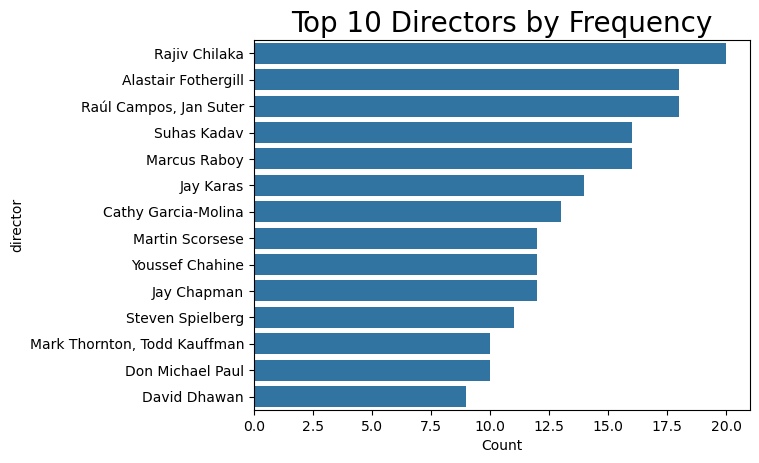

In [62]:
#Explore Top Insights
# 2. Most Frequent Directors:
top_directors = df['director'].value_counts().head(15)
top_directors = top_directors.iloc[1:]
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors by Frequency', fontsize=20)
plt.xlabel('Count')
plt.show()


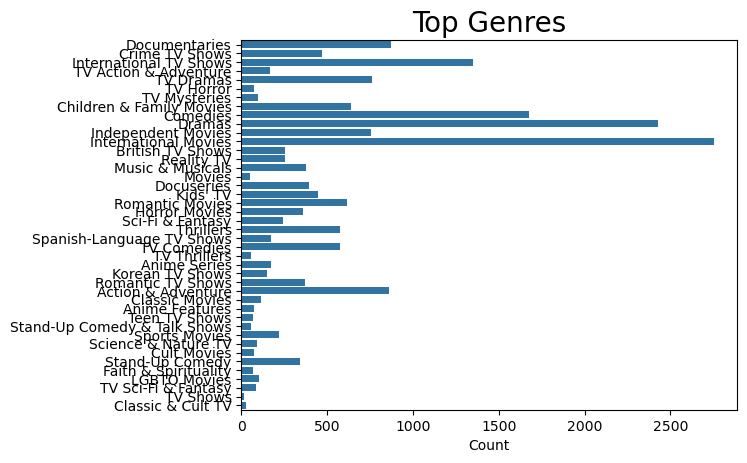

In [63]:
# Split genres in 'listed_in' and count frequency
from collections import Counter

genres = df['listed_in'].str.split(', ').explode()
genre_counts = Counter(genres)
sns.barplot(x=list(genre_counts.values()), y=list(genre_counts.keys()))
plt.title('Top Genres', fontsize=20)
plt.xlabel('Count')
plt.show()


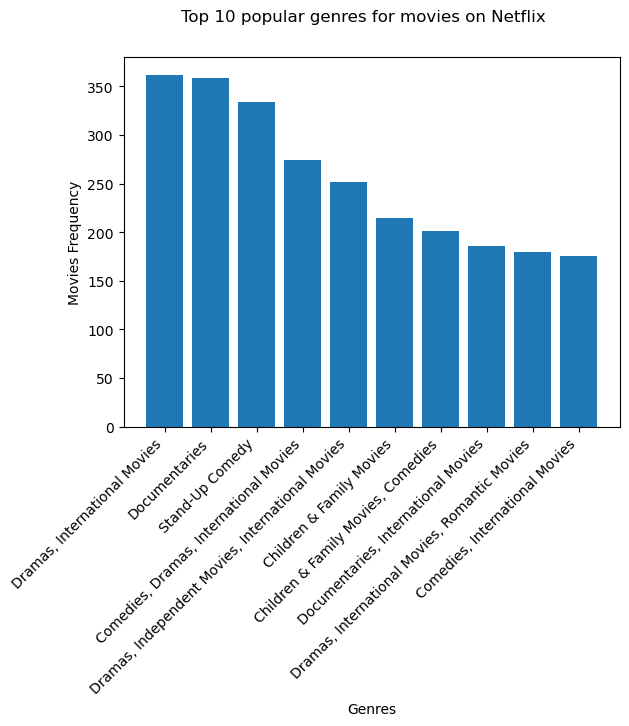

In [64]:
# Top 10 popular movie genres

popular_movie_genre=df[df['type']=='Movie'].groupby("listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre=df[df['type']=='TV Show'].groupby("listed_in").size().sort_values(ascending=False)

plt.bar(popular_movie_genre.index, popular_movie_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()

In [70]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


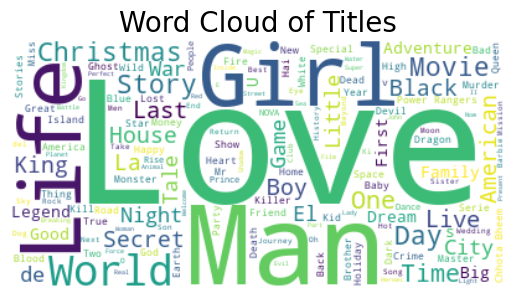

In [72]:
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(background_color='white').generate(' '.join(df['title']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Titles', fontsize=20)
plt.show()
